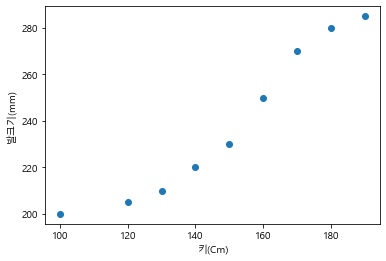

In [1]:
# 데이터 상관관계 분석
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 폰트 설정
font_location = 'c:/windows/fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# 가시화 내용
height = [100, 120, 130, 140, 150, 160, 170, 180, 190]
foot_size = [200, 205, 210, 220, 230, 250, 270, 280, 285]
plt.scatter(height, foot_size)
plt.xlabel('키(Cm)')
plt.ylabel('발크기(mm)')
plt.show()

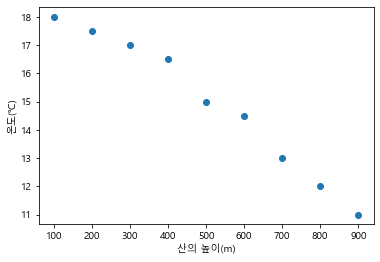

In [2]:
height = [100, 200, 300, 400, 500, 600, 700, 800, 900]
temperature = [18.0, 17.5, 17, 16.5, 15, 14.5, 13, 12, 11]
plt.scatter(height, temperature)
plt.xlabel('산의 높이(m)')
plt.ylabel('온도(℃)')
plt.show()

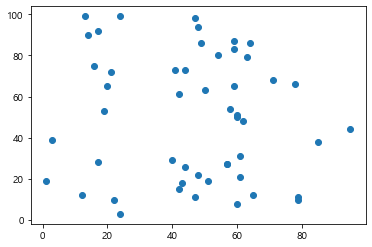

In [3]:
import numpy as np

random_x = np.random.random_integers(0, 100, 50)
random_y = np.random.random_integers(0, 100, 50)
plt.scatter(random_x, random_y)
plt.show()

In [4]:
import numpy as np
import pandas as pd

# 일차원(array) 데이터의 활용
s = pd.Series(np.random.randn(5))
s

0   -0.256108
1    0.584837
2   -0.895737
3    1.629343
4   -0.983805
dtype: float64

In [5]:
s = s = pd.Series(np.random.randn(5), index=['A', 'B', 'C', 'D', 'E'])
s

A    0.689230
B   -0.331040
C    0.021066
D    0.658242
E   -0.582924
dtype: float64

In [6]:
# 딕셔너리 인덱스를 부여하지 않으면 딕셔너리 키값이 인덱스로 들어간다
d = {'a' : 0., 'b':1., 'c':2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [7]:
pd.Series(d, index=['a', 'b', 'B', 'c'])

a    0.0
b    1.0
B    NaN
c    2.0
dtype: float64

In [8]:
# 스칼라(Scalar) 값을 초기화 하는 경우 반드시 인덱스가 들어가야 한다.
pd.Series(7, index=['a', 'b', 'c', 'd', 'e'])

a    7
b    7
c    7
d    7
e    7
dtype: int64

In [9]:
s = pd.Series([1,2,3,4,5], index=['a','b','c','d','e'])
s[0]

1

In [10]:
s[:3]

a    1
b    2
c    3
dtype: int64

In [11]:
s[[4,1]]

e    5
b    2
dtype: int64

In [12]:
np.power(s, 2)

a     1
b     4
c     9
d    16
e    25
dtype: int64

In [13]:
# DataFrame 활용 Series/Dict
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']), 'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
d

{'one': a    1.0
 b    2.0
 c    3.0
 dtype: float64,
 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [14]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [15]:
# 인덱스의 값은 다른 한쪽이 없는경우에는 NaN을 입력하게 된다
# 인덱스 값을 부여하지 않으면 자동으로 0부터 두개의 데이터 중 큰 배열의 길이 -1 만큼 부여된다.
d = {'one' : pd.Series([1., 2., 3.]), 'two' : pd.Series([1., 2., 3., 4.])}
df = pd.DataFrame(d)
df

,one,two
0,1.0,1.0
1,2.0,2.0
2,3.0,3.0
3,NaN,4.0


In [16]:
d = {'one' : [1., 2., 3., 4.], 'two' : [4., 3., 2., 1.]}
df = pd.DataFrame(d)
df

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [17]:
# Dict 리스트 데이터의 활용
# 내가 원하는 열의 값만 선택하여 하나의 테이블로 만들수 있다
# rename()을 이용하여 지정한 열의 이름을 바꿀수 있고 특정 열을 인덱스 열로 변경 가능하다
data2 = [{'a':1, 'b':2}, {'a':5, 'b':10, 'c':20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [18]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [19]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


In [20]:
df.rename(columns={'one':'COL1'})

,COL1,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [21]:
df.set_index('two')

,one
two,
4.0,1.0
3.0,2.0
2.0,3.0
1.0,4.0


In [22]:
# 데이터 추가 및 합치기(merge)
data1 = [{'name':'Mark'},{'name':'Eric'},{'name':'Jennifer'}]
df = pd.DataFrame(data1)
df

,name
0,Mark
1,Eric
2,Jennifer


In [23]:
df['age'] = [10, 11, 12]
df

,name,age
0,Mark,10
1,Eric,11
2,Jennifer,12


In [24]:
data2 = [{'sido':'서울'}, {'sido':'경기'}, {'sido':'인천'}]
df2 = pd.DataFrame(data2)
df2

,sido
0,서울
1,경기
2,인천


In [25]:
pd.merge(df, df2, left_index=True, right_index=True)

,name,age,sido
0,Mark,10,서울
1,Eric,11,경기
2,Jennifer,12,인천
